<a href="https://colab.research.google.com/github/annsyj94/Drug-Classification-/blob/main/Drugs_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drug Classification

The purpose of the task is to predict the outcome of the drugs that might be accurate for the patient with machine learning. 

In [71]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 

df = pd.read_csv("https://raw.githubusercontent.com/annsyj94/Drug-Classification-/main/drug200.csv")
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [72]:
df.shape

(200, 6)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [74]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


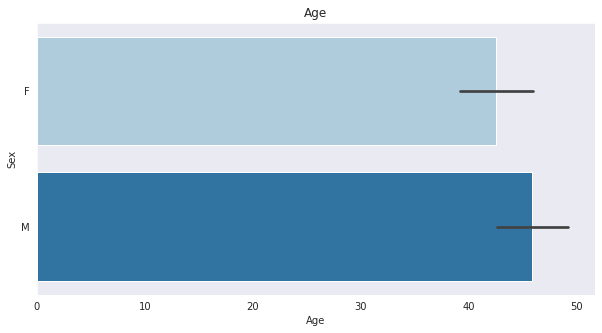

In [75]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="Age",y="Sex",palette="Paired").set_title("Age")
plt.show()

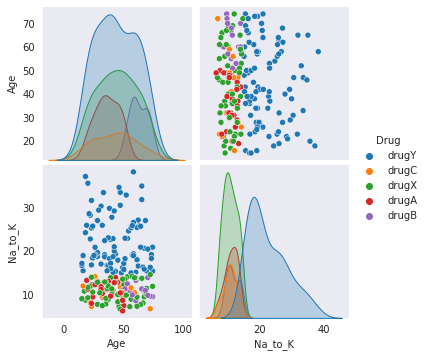

In [76]:
sns.pairplot(df,hue="Drug")

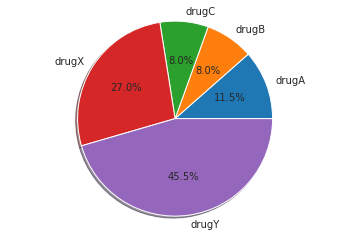

In [77]:
#Pie Chart 
labels = df['Drug'].astype('category').cat.categories.tolist()
counts = df['Drug'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
f,ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True)
ax.axis('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


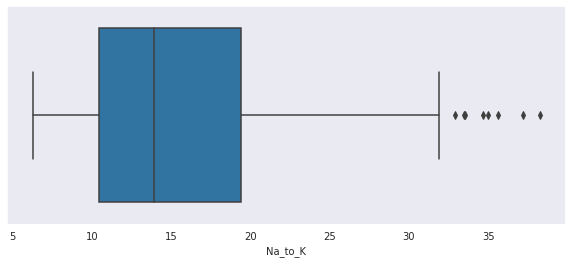

In [79]:
# Page Views Per Visit 
plt.figure(figsize=[10,4])
sns.boxplot(df['Na_to_K'])

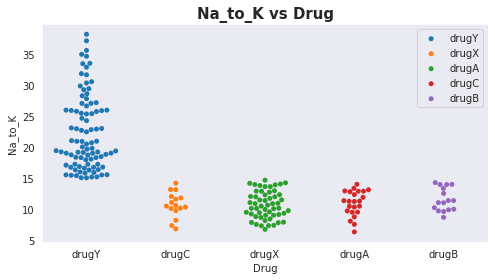

In [80]:
# Analyze Drug based on Na_to_k 
plt.figure(figsize=(8,4))
sns.swarmplot(data=df, x = "Drug", y="Na_to_K")
plt.legend(df.Drug.value_counts().index)
plt.title("Na_to_K vs Drug", fontsize=15, fontweight='bold')
plt.show()

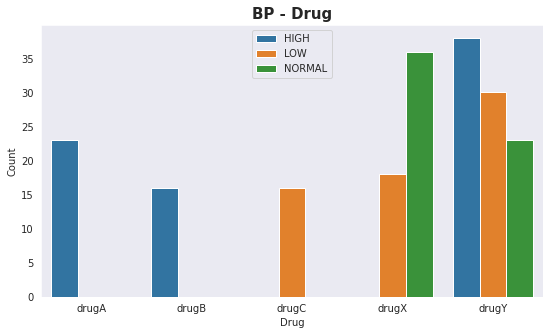

In [81]:
#Analyze Drug based on BP
df2 = df.groupby(['Drug','BP']).size().reset_index(name="Count")

plt.figure(figsize = (9,5))
sns.barplot(x='Drug',y='Count', hue = 'BP', data = df2)
plt.title('BP - Drug', fontsize=15, fontweight='bold')
plt.legend(loc='upper center')
plt.show()


In [82]:
# Use LabelEncoder()

le = LabelEncoder()

df["BP"] = le.fit_transform(df["BP"])
df["Sex"] = le.fit_transform(df["Sex"])
df['Cholesterol']=le.fit_transform(df['Cholesterol'])
df['Drug']=le.fit_transform(df['Drug'])

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [83]:
import numpy as np 
from sklearn.model_selection import train_test_split 

data = df[["Age","Sex","BP","Cholesterol","Na_to_K"]].to_numpy()
target = df['Drug'].to_numpy()

train_input,test_input,train_target,test_target=train_test_split(data,target,test_size=0.2, random_state=42)

print(train_input.shape)
print(test_input.shape)

(160, 5)
(40, 5)


In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 


ss = StandardScaler()
ss.fit(train_input)
train_scaler = ss.transform(train_input)
test_scaler = ss.transform(test_input)

#Use LogisticRegression 
lr = LogisticRegression()
lr.fit(train_scaler,train_target) 
print(lr.score(train_scaler,train_target))
print(lr.score(test_scaler,test_target))

0.95625
0.925


In [85]:
print(lr.coef_, lr.intercept_)

[[-0.96434773  0.09473756 -1.97868835 -0.26781085 -1.3856217 ]
 [ 1.30335245 -0.1945504  -1.65844318  0.03972036 -0.51340797]
 [-0.26072945  0.18533706  0.34733585 -1.18387172 -0.90842523]
 [-0.12825195 -0.24403846  2.54049472  1.06406654 -1.38990447]
 [ 0.04997668  0.15851423  0.74930097  0.34789567  4.19735937]] [-1.52942331 -1.45633019 -0.50571413  0.36890011  3.12256752]


In [86]:
#Use DecisionTreeClassifier 

dtc = DecisionTreeClassifier(max_depth=3,random_state = 42)
dtc.fit(train_scaler,train_target)
print(dtc.score(train_scaler,train_target))
print(dtc.score(test_scaler,test_target))

0.93125
0.875


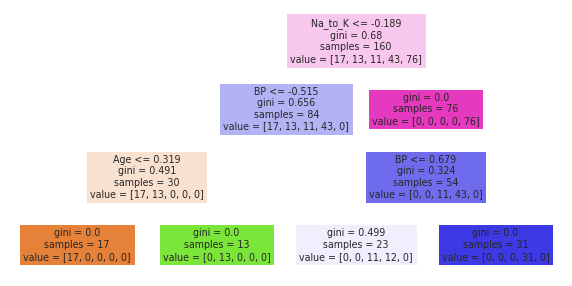

In [87]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,5))
plot_tree(dtc, filled=True, feature_names=["Age","Sex","BP","Cholesterol","Na_to_K"])
plt.show()

In [88]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9875


In [89]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(tree_method='hist',random_state=42)
scores = cross_validate(xgb,train_input,train_target,return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.975


In [90]:
from lightgbm import LGBMClassifier 

lgm = LGBMClassifier(random_state=42)
scores = cross_validate(lgm,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.98125


In [99]:
# Predicting values 
drug_predict = lr.predict(test_scaler)
print(drug_predict)

[3 0 3 2 4 4 4 3 0 3 0 3 4 0 1 4 1 3 2 4 1 3 3 4 4 4 2 3 4 4 4 2 4 4 0 4 3
 0 4 0]


In [100]:
from sklearn.metrics import classification_report 

print(classification_report(test_target,drug_predict))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      0.91      0.95        11
           4       0.88      0.93      0.90        15

    accuracy                           0.93        40
   macro avg       0.95      0.93      0.93        40
weighted avg       0.93      0.93      0.93        40



In [103]:
# Create a file 
file = pd.concat([df,pd.DataFrame(drug_predict,columns=["Drug_Predict"])],axis=1)
file.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_Predict
0,23,0,0,0,25.355,4,3.0
1,47,1,1,0,13.093,2,0.0
2,47,1,1,0,10.114,2,3.0
3,28,0,2,0,7.798,3,2.0
4,61,0,1,0,18.043,4,4.0


In [104]:
file.to_csv('drugs_classification.csv',index=False)
print("Finish Downloading")

Finish Downloading
